# Basics

## Reading Data With Pandas

In [ ]:
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## Manipulating Data with Pandas

In [ ]:
col = df['Fare']
col

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64

In [ ]:
small_df = df[['Age','Sex','Survived']]
small_df.head()

,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


In [ ]:
df['male'] = df['Sex'] == 'male'
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


## Numpy basics

In [ ]:
df['Fare'].values.shape

(887,)

In [ ]:
df[['Pclass','Fare','Age']].values

array([[ 3.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 3.    ,  7.925 , 26.    ],
       ...,
       [ 3.    , 23.45  ,  7.    ],
       [ 1.    , 30.    , 26.    ],
       [ 3.    ,  7.75  , 32.    ]])

In [ ]:
arr = df[['Pclass','Fare','Age']].values
arr.shape

(887, 3)

In [ ]:
arr[1,:]

array([ 1.    , 71.2833, 38.    ])

In [ ]:
arr[arr[:,2] < 18].shape

(130, 3)

In [ ]:
(arr[:,2] < 18).sum()

130

## Plotting Basics

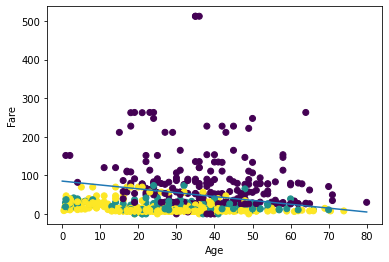

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Fare'], c=df['Pclass'], label = df['Pclass'])
plt.plot([0, 80], [85, 5])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Classification

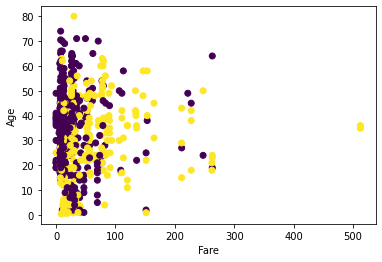

In [ ]:
plt.scatter(df['Fare'],df['Age'],c=df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

## Build a Logistic Regression Model with Sklearn

In [ ]:
df['male'] = df['Sex'] == df['male']
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = df[['Fare','Age']].values
y = df['Survived'].values
model.fit(X,y)
print(model.coef_, model.intercept_)

[[ 0.01615949 -0.01549065]] [-0.51037152]


In [ ]:
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
model.predict(X)
print(model.predict(X[:5]))

[0 1 0 1 0]


### Score the model

In [ ]:
y_pred = model.predict(X)
print((y == y_pred).sum()/y.shape[0])

0.7012401352874859


In [ ]:
print(model.score(X,y))

0.7012401352874859


## Logistic Regression with the Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
print(cancer_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
cancer_data['data'].shape

(569, 30)

In [ ]:
df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['target'] = cancer_data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Build a Logistic Regression Model

In [ ]:
X = df[cancer_data.feature_names].values
y = df['target'].values

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict([X[0]])[0]

0

In [ ]:
model.score(X, y)

0.9595782073813708

# Model Evaluation

## Confusion Matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))

Accuracy: 0.8049605411499436
Precision: 0.7734627831715211
Recall: 0.6988304093567251
F1: 0.7342549923195083


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[475  70]
 [103 239]]


## Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print("whole dataset:", X.shape, y.shape)

print("training set:", X_train.shape, y_train.shape)

print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.score(X_test, y_test))

0.8063063063063063


In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.8063063063063063
Precision: 0.7469879518072289
Recall: 0.7380952380952381
F1: 0.7425149700598803


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)

Threshold alto $\implies$ Mas predicciones negativas, Presicion alto, Recall bajo \\
Threshold bajo $\implies$ Mas predicciones positivas, Presicion bajo, Recall alto

In [ ]:
sensitivity_score = recall_score(y_test, y_pred)
print(sensitivity_score)

0.6746987951807228


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]
print(specificity_score(y_test, y_pred)) 

0.8345323741007195


In [ ]:
model.predict_proba(X_test)[:,1]

array([0.57019736, 0.73794333, 0.51538945, 0.57043979, 0.80657064,
       0.81732919, 0.04817941, 0.26507213, 0.11287544, 0.75128433,
       0.12609256, 0.35888066, 0.64421203, 0.23332649, 0.901292  ,
       0.09160712, 0.08336294, 0.55086726, 0.21146664, 0.42739011,
       0.66655984, 0.15638032, 0.14458235, 0.22053188, 0.15105313,
       0.21135978, 0.50345419, 0.33603916, 0.28409682, 0.16675563,
       0.77859593, 0.17389174, 0.83406866, 0.03213913, 0.06102709,
       0.20946671, 0.38697691, 0.54559262, 0.29932491, 0.47277705,
       0.12520878, 0.65785349, 0.47727208, 0.09190008, 0.16208216,
       0.85124082, 0.398699  , 0.05763258, 0.25822227, 0.52515401,
       0.69449213, 0.85067737, 0.96266188, 0.02185839, 0.84451209,
       0.08656413, 0.16214191, 0.1949136 , 0.15144914, 0.14572731,
       0.16120727, 0.25853214, 0.18677355, 0.21182877, 0.81504488,
       0.10876981, 0.73710835, 0.92802089, 0.13564778, 0.13939784,
       0.68680535, 0.15652888, 0.18172545, 0.89838152, 0.34307

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1] > 0.75
print("accuracy", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

accuracy 0.7792792792792793
precision: 0.9722222222222222
recall: 0.42168674698795183


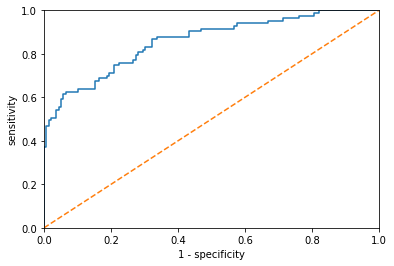

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8580220161220421


In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[: , 0:2])
print("model 2 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8580220161220421
model 2 AUC score: 0.8372193811216087


## K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]
kf = KFold(n_splits = 3, shuffle = True)
for train, test in kf.split(X):
  print(train,test)

[0 1 2 5] [3 4]
[0 1 3 4] [2 5]
[2 3 4 5] [0 1]


In [ ]:
splits = list(kf.split(X))
first_split = splits[0]
print(first_split)

(array([1, 2, 3, 5]), array([0, 4]))


In [ ]:
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)

training set indices: [1 2 3 5]
test set indices: [0 4]


In [ ]:
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

X_train
[[38.     71.2833]
 [26.      7.925 ]
 [35.     53.1   ]
 [27.      8.4583]]
y_train [1 1 1 0]
X_test
[[22.    7.25]
 [35.    8.05]]
y_test [0 0]


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses','Parents/Children','Fare']].values
y = df['Survived'].values

kf = KFold(n_splits = 5, shuffle = True)
scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = LogisticRegression()
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
print(scores)
print(np.mean(scores))

[0.8314606741573034, 0.8033707865168539, 0.8418079096045198, 0.7740112994350282, 0.768361581920904]
0.8038024503269219


In [ ]:
final_model = LogisticRegression()
final_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Comparison

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
kf = KFold(n_splits=5, shuffle=True)
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def score_model(X, y, kf):
  accuracy = []
  precision = []
  recall = []
  f1 = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
  print("accuracy: ", np.mean(accuracy))
  print("precision: ", np.mean(precision))
  print("recall: ", np.mean(recall))
  print("f1: ", np.mean(f1))

In [ ]:
print('Logistic Regression with all features')
score_model(X1,y,kf)
print()
print("Logistic Regression with Pclass, Sex & Age")
score_model(X2,y,kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3,y,kf)

Logistic Regression with all features
accuracy:  0.7993271122960707
precision:  0.7649273211065664
recall:  0.6962061254604294
f1:  0.7279345532955891

Logistic Regression with Pclass, Sex & Age
accuracy:  0.7992826763156224
precision:  0.750225374325824
recall:  0.7134654158206863
f1:  0.7303210608375561

Logistic Regression with Fare & Age features
accuracy:  0.6538691042975942
precision:  0.6489417989417989
recall:  0.22839086484628118
f1:  0.33742886254738375


In [ ]:
model = LogisticRegression()
model.fit(X1, y)
model.score(X1,y)

0.8049605411499436

# Decision Tree Model

La medida matemática que representa la mejor division de un atributo es la **Ganancia de informacion**. Valor de 0 a 1.

Gananciade informacion = $ H(S) - \frac{|A|}{|S|}H(A) - \frac{|B|}{|S|}H(B)$ 

## Impureza de Gini

$Gini = 2 (1-p) p$

## Entropia

$Entropy = -[p\log{_2}{p} + (1 - p) \log{_2}{(1 - p)}]$

## Decision Trees in Scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses','Parents/Children','Fare']].values
y = df['Survived'].values
model = DecisionTreeClassifier() #Gini Impurity
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)
model.fit(X_train, y_train)
print(model.predict([[3, True, 22, 1, 0 , 7.25]]))

[0]


In [ ]:
print("accuracy:", model.score(X_test, y_test))

accuracy: 0.7747747747747747


In [ ]:
kf = KFold(n_splits = 5, shuffle = True)
for criterion in ['gini', 'entropy']:
  print("Decision Tree - {}".format(criterion))
  accuracy = []
  precision = []
  recall = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = DecisionTreeClassifier(criterion=criterion)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
  print("accuracy:", np.mean(accuracy))
  print("precision:", np.mean(precision))
  print("recall:", np.mean(recall))

Decision Tree - gini
accuracy: 0.7846505427537611
precision: 0.7211013743396902
recall: 0.7190347355601732
Decision Tree - entropy
accuracy: 0.7767599822256079
precision: 0.7101127135456506
recall: 0.7198501482044847


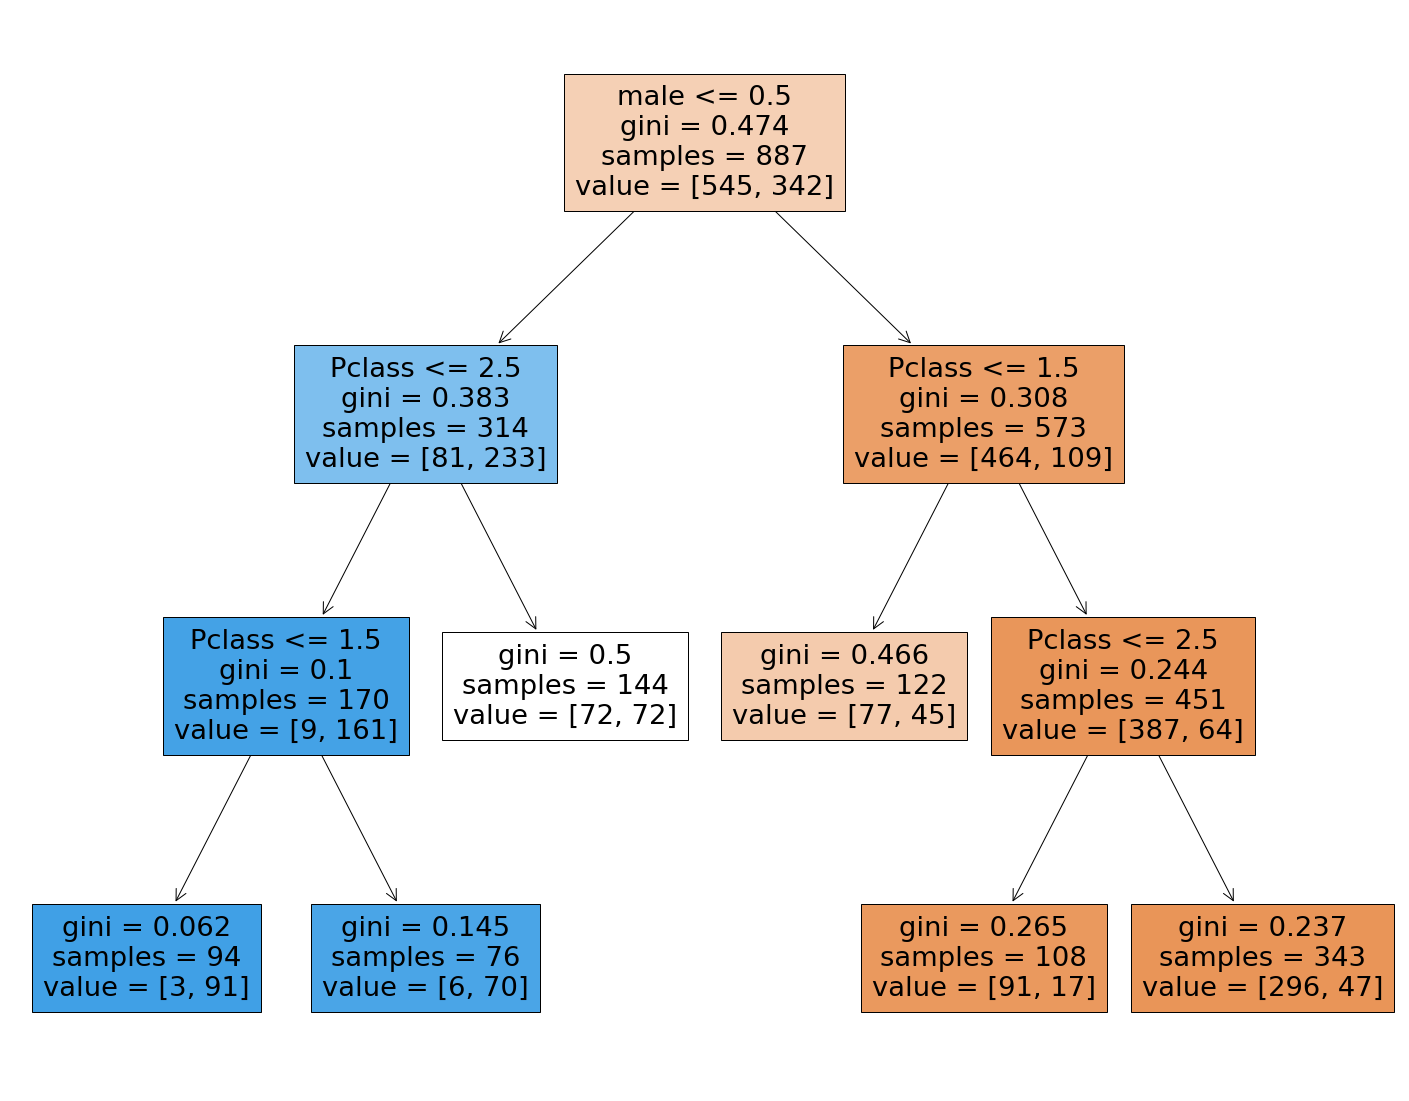

In [ ]:
from sklearn.tree import plot_tree
import graphviz
import matplotlib.pyplot as plt
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
                   feature_names=feature_names,  
                   filled=True)


## Pruning Tree

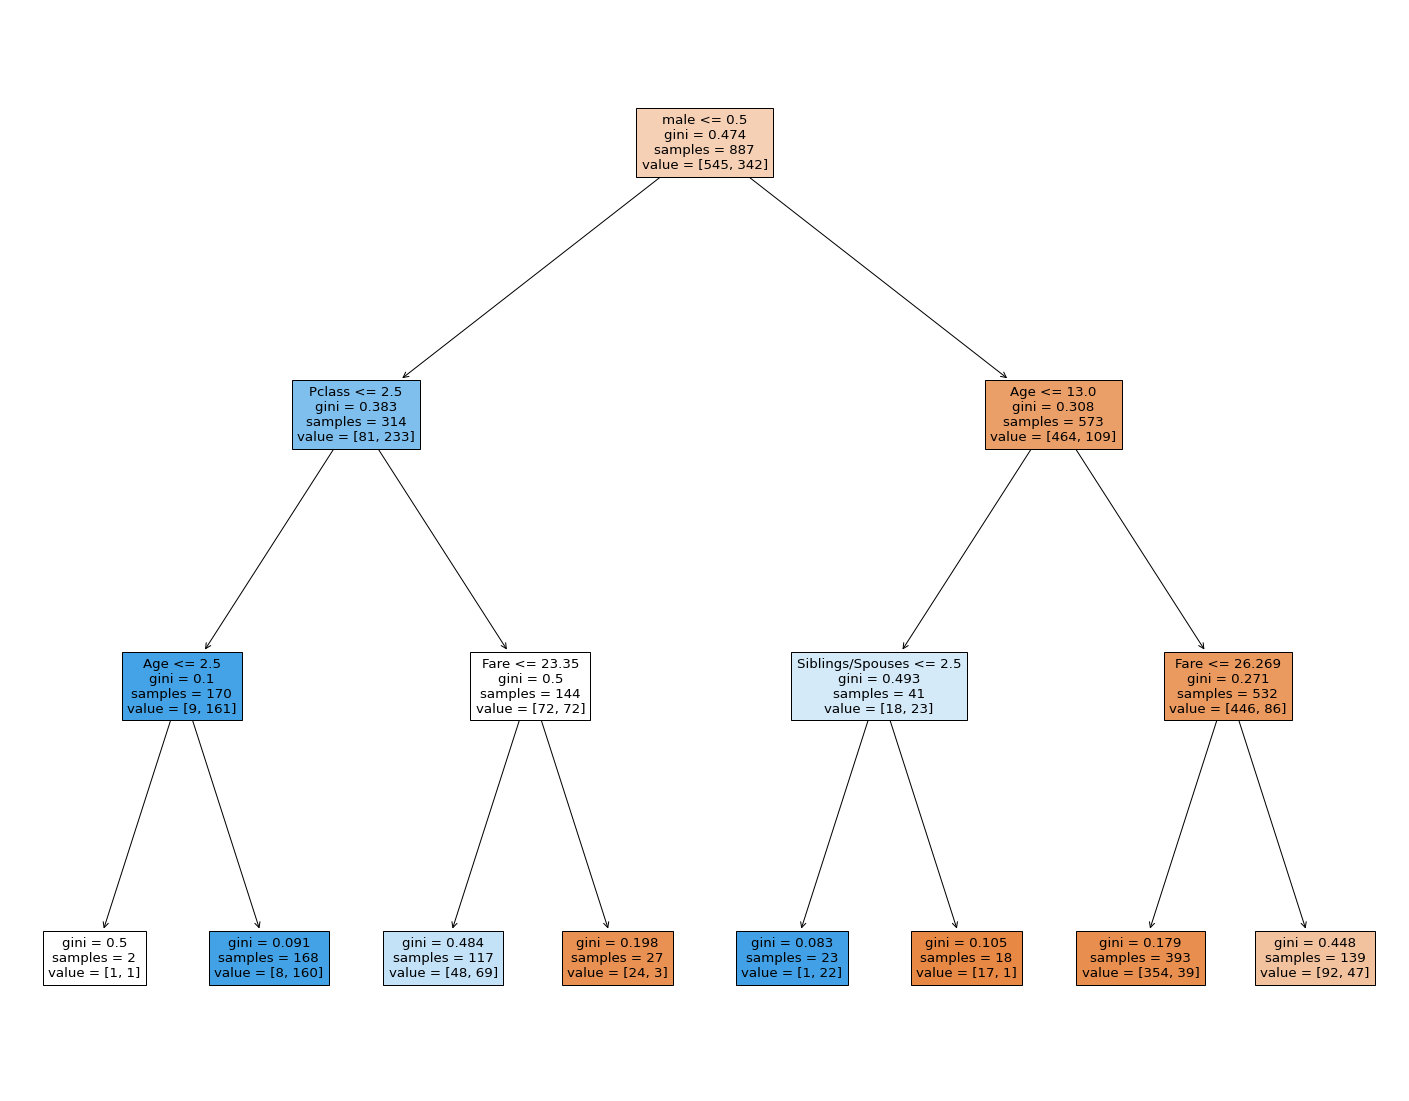

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
feature_names = ['Pclass', 'male', 'Age', 'Siblings/Spouses','Parents/Children','Fare']
X = df[feature_names].values
y = df['Survived'].values
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)
dt.fit(X,y)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
                   feature_names=feature_names,  
                   filled=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [3, 5, 20],
    'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 15, 25],
                         'm

In [ ]:
print("best params: ", gs.best_params_)

best params:  {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 3}


In [ ]:
print("best score: ", gs.best_score_)

best score:  0.7667478548733918


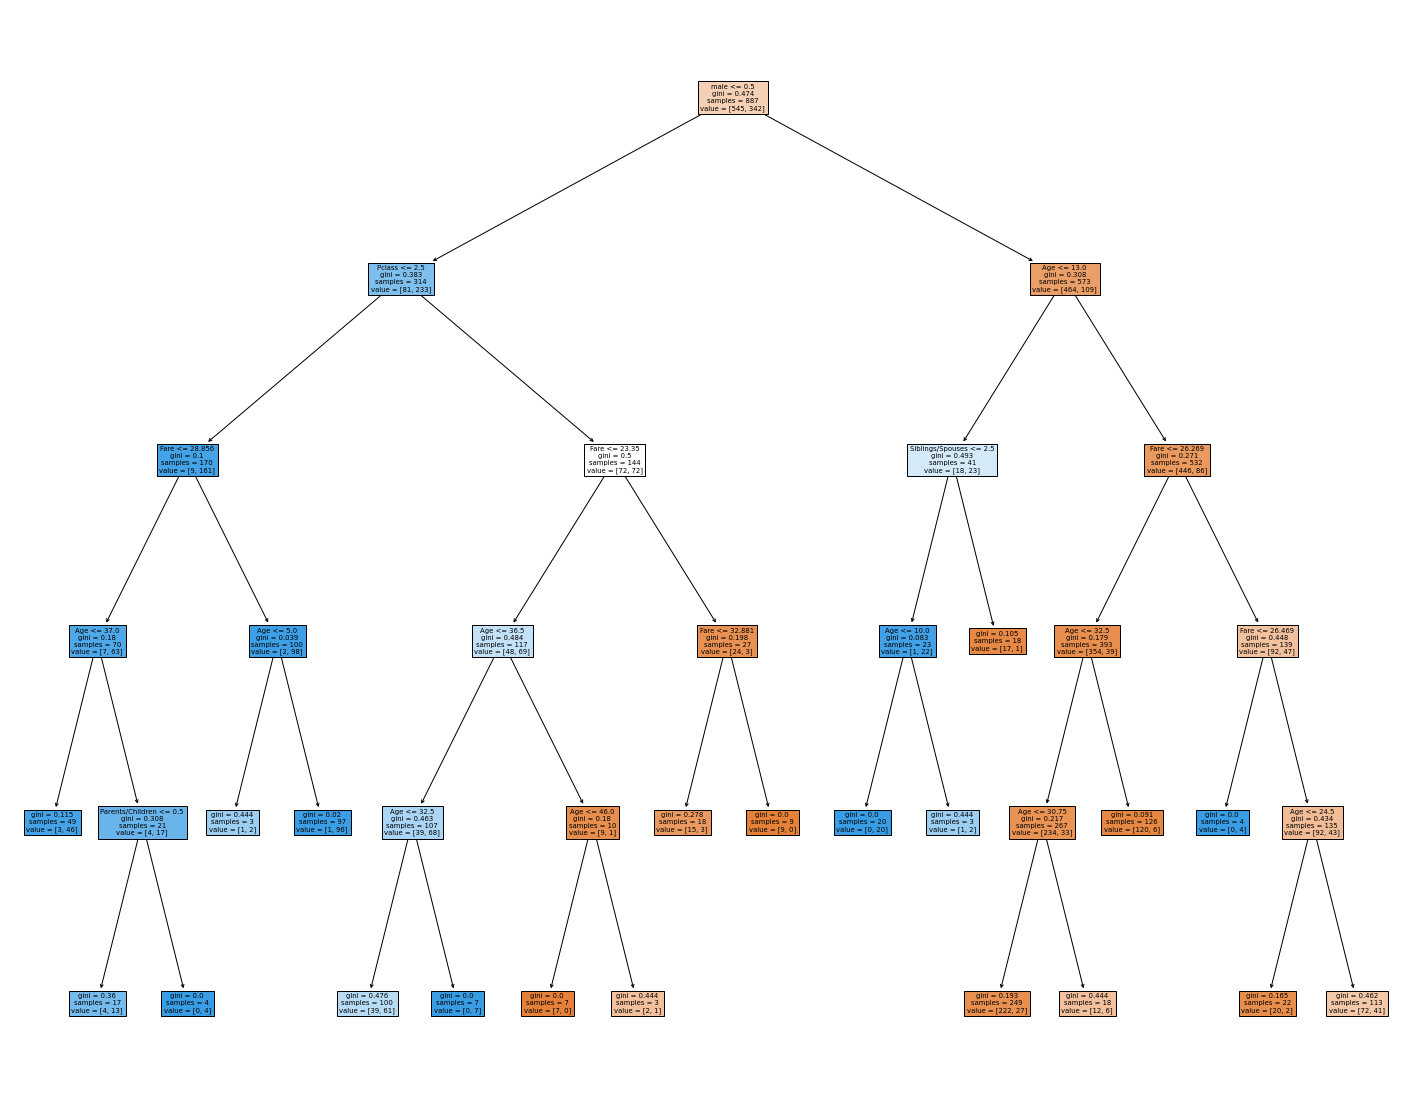

In [ ]:
feature_names = ['Pclass', 'male', 'Age', 'Siblings/Spouses','Parents/Children','Fare']
X = df[feature_names].values
y = df['Survived'].values
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, max_leaf_nodes=20)
dt.fit(X,y)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
                   feature_names=feature_names,  
                   filled=True)

In [ ]:
dt.score(X,y)

0.846674182638106

## Pros and Cons

### Computation

1. Cuanta computación se necesita para construir el modelo
2. Cuanta computación se necesita para predecir.

> Computacionalmente, un árbol de decisión es caro de construir.

> En cambio, predecir es muy barato

### Performance

Árboles de decisión son propensos a **Overfitting**. Por eso es que se acude al tuning de los parámetros.

### Interpretability

* Fácilmente de interpretar
* Fácil explicación de la predicción.

# Random Forest Model

## Definición de Random Forest

**Arboles de decisiones** son susceptibles a idiosincracia aleatoria en el conjunto de entrenamiento. 
**Arboles de decisiones** obtiene la esencia de los datos sin importar su estructura.

**Objetivo** : Tomar las ventajas de los árboles de decisión mientras se mitiga los problemas de varianza.

- Nota: Random forest es un ejemplo de un **ensemble** porque usa multiples modelos de machine learning para crear un único modelo. 

### Bootstrapping

Un **bootstrapped sample** es un ejemplo aleatorio de datos donde nosotros aleatoriamente seleccionamos datos de nuestro dataset original para crear un dataset del mismo tamaño.

### Baggin Decision Trees

**Bagging** es una técnica que permite reducir la varianza de un modelo a partir de un ensamblado de multiples modelos construidos en bootstrapped samples.

### Decorrelate the Trees

Restricciones al modelo cuando construye el árbol de decisión.

La elección estándar de features a considerar en cada split es la raíz cuadrada de la cantidad de features.

## Random Forests with Sklearn

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


In [ ]:
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.9790209790209791


Comparemos con un modelo de Árbol de Decisión

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.9020979020979021


## Tuning a Random Forest

Dos nuevos parámetros:

* n_estimators: número de árboles (Por defecto es $10$)
* max_features: número de features a considerar en cada split (Por defecto es $\sqrt{x}$).

In [ ]:
rf = RandomForestClassifier(max_features=5)
rf = RandomForestClassifier(n_estimators=15)

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = { 'n_estimators': [10,25,50,75,100],}

In [ ]:
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv = 5)

In [ ]:
gs.fit(X, y)
print("best params: ", gs.best_params_)

best params:  {'n_estimators': 100}


En caso de haber un dataset con clases desbalanceadas, podemos usar la métrica  *f1-score*.

In [ ]:
rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv = 5)
gs.fit(X, y)
print("best params:", gs.best_params_)
print("best score: ", gs.best_score_)

best params: {'n_estimators': 25}
best score:  0.9764338449852877


## Elbow Graph

**Elbow Graph** es un modelo que optimiza la performance sin añadir complejidad innecesaria.

In [ ]:
n_estimators = list(range(1,101))
param_grid = {'n_estimators': n_estimators,}

rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv = 5)
gs.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

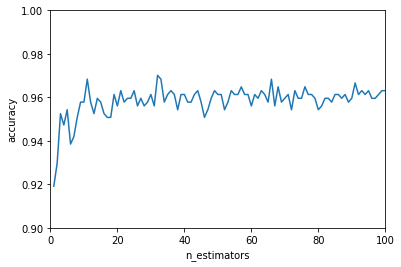

In [ ]:
import matplotlib.pyplot as plt

scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y)
print("random forest accuracy:", rf.score(X, y))

random forest accuracy: 0.9982425307557118


## Feature Importances

Escoger los atributos que mejor representen al dataset.

**Random Forest** selecciona mediante la disminición de la **Impureza**. Típicamente **Impureza de Gini** o **Entropía** en clasificación.

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(rf.feature_importances_,
                   index = cancer_data.feature_names).sort_values(ascending=False)
ft_imp.head(10)

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64

¿ Por qué hacer selección de atributos ?

1. Nos permite entrenamientos más rápidos.
2. Reduce la complejidad del modelo y lo hace más fácil de interpretar.
3. Si se escoge el correcto subconjunto, puede mejorar el accuracy del modelo.

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 111)
rf.fit(X,y)
rf.score(X_test, y_test)

0.993006993006993

In [ ]:
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [ ]:
X_worst = df[worst_cols]
X_train , X_test, y_train, y_test = train_test_split(X_worst, y, random_state = 101)

In [ ]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.972027972027972

## Random Forest Pros & Cons

### Performance

Generalmente tiene buen desempeño sin necesitar tuning de parámetros.

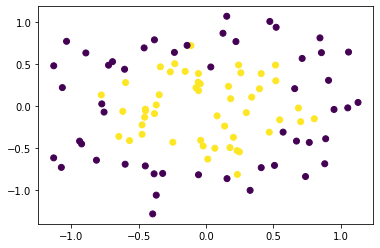

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise = 0.2, factor = 0.5, random_state= 1)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  lr = LogisticRegression(solver='lbfgs')
  lr.fit(X_train, y_train)
  lr_scores.append(lr.score(X_test, y_test))
  rf = RandomForestClassifier(n_estimators=100)
  rf.fit(X_train, y_train)
  rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.86


### Interpretability

No son fáciles de interpretar. Tiene varios árboles de decisiones. No es una buena opción cuando se buscar la interpretabilidad.

### Computation

Puede ser un poco más lento de construir, especialmente si se tiene una gran cantidad de árboles. Cada árbol por sí solo es más rápido de construir que uno estándar porque no compara cada característica en cada split, sin embargo la cantidad de árboles lo hace lento.

Similarmente, predecir con un Random Forest será más lento que un Decision Tree.

# Neural Networks

## Neural Network definition

* Se desenvuelven bien con una gran cantidad de atributos, ellos automáticamente hacen la ingeniería de atributos sin requerir conocimiento del domino para reestructurar los atributos.

ANN fue inspirado por cómo las redes neuronales biológicas trabajan en el cerebro humano.

## A Neuron

Es un simple objeto que toma un input, hace cálculos y produce un output.

* $w_1 x_1 + w_2 x_2 + b$. $w$ son los pesos y $b$ es el bias.

Luego se calcular el valor, se pasa por una **función de activación**

Para *Regresión Logística* se utiliza la función **Sigmoidal** que lleva el valor de 0 a 1:

$sigmoid(x)= \frac{1}{1 + e^{-x}}$


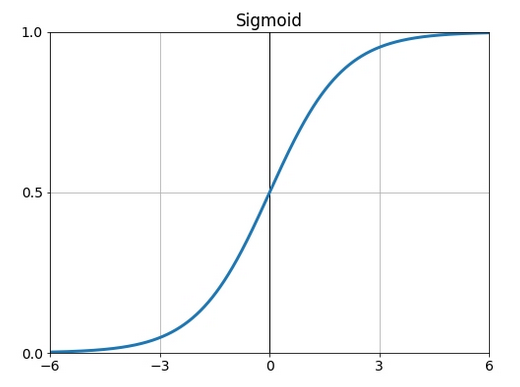

$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

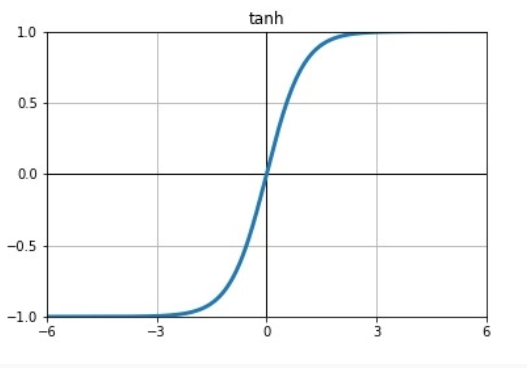

ReLU

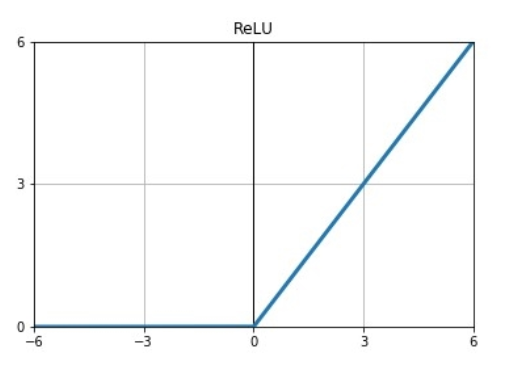

## Neural Network

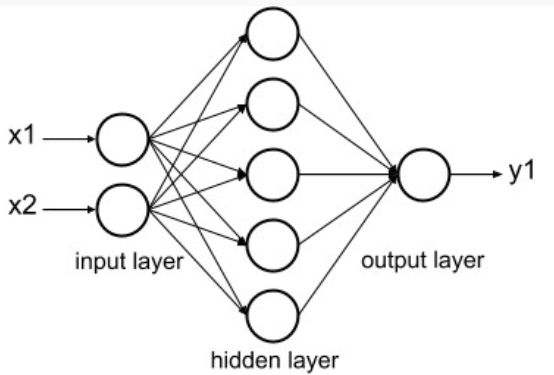

## Training the Neural Network

### Loss

** Loss Function ** es una función que monitorea cuan bien está haciendo el trabajo la red neuronal. Cuando se entrena, nosotros optimizamos la Loss.

Para Regresión Logística es común usar **Cross entropy**

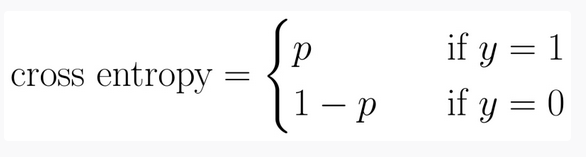

###Backpropagation

Es el proceso de actualizar los valores de los pesos para converger al mejor modelo posible. Actualiza de adelante hacia atrás.

## Neural Networks in Scikit-Learn

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, random_state = 3)

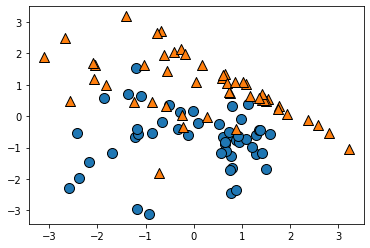

In [6]:
from matplotlib import pyplot as plt
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=100, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=100, edgecolors='k', marker='^')
plt.show()

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,50), alpha=0.0001,
                    solver='adam', random_state=3)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [8]:
print("accuracy: ", mlp.score(X_test, y_test))

accuracy:  0.76


## Predicting Handwritten Digits

### The MNIST Dataset

In [9]:
from sklearn.datasets import load_digits

X, y = load_digits(n_class = 2, return_X_y = True)
print(X.shape, y.shape)

print(X[0])

print(y[0])

(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [10]:
print(X[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


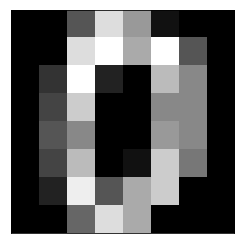

In [11]:
import matplotlib.pyplot as plt
plt.matshow(X[0].reshape(8,8), cmap= plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

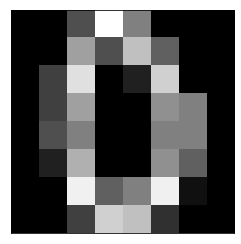

[0]


In [13]:
x = X_test[0]
plt.matshow(x.reshape(8,8), cmap = plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))

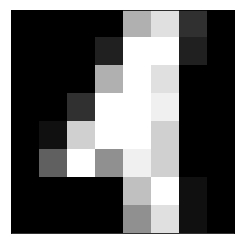

[1]


In [14]:
x = X_test[1]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))

In [15]:
print(mlp.score(X_test, y_test))

1.0


Usando las 10 clases...

In [16]:
X, y = load_digits(return_X_y=True)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state = 0)
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))

0.9688888888888889


Veamos los incorrectos

In [18]:
y_pred = mlp.predict(X_test)
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test] 

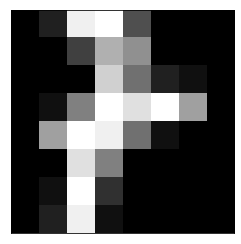

true value: 7
predicted value: 1


In [20]:
j = 1
plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print("true value:", incorrect_true[j])
print("predicted value:", incorrect_pred[j])

## Visualizing MLP Weights 

In [22]:
from sklearn.datasets import fetch_openml
import numpy as np
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)
print(X.shape, y.shape)
print(np.min(X), np.max(X))
print(y[0:5])

(70000, 784) (70000,)
0.0 255.0
['5' '0' '4' '1' '9']


In [25]:
X5 = X[y <= '3']
y5 = y[ y <= '3']

In [26]:
mlp=MLPClassifier(hidden_layer_sizes=(6,), max_iter=200, alpha=1e-4,
                  solver='sgd', random_state=2)
mlp.fit(X5, y5)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [27]:
print(mlp.coefs_)

[array([[-0.01115575, -0.08262854,  0.00865591, -0.01127296, -0.01387947,
        -0.02957174],
       [-0.05147818,  0.0207883 , -0.03491913, -0.04064077,  0.02111298,
         0.00507931],
       [-0.06369078,  0.00236659, -0.05500046,  0.0497324 ,  0.06169602,
        -0.00100449],
       ...,
       [ 0.03318823,  0.03072627,  0.04947788, -0.07696042, -0.02204155,
        -0.00295475],
       [ 0.03754548,  0.02460184,  0.03225107,  0.04285346, -0.07510661,
        -0.05427416],
       [-0.06503772, -0.07023683, -0.02863245, -0.01949495,  0.07608979,
        -0.05707046]]), array([[ 0.16384742, -2.14555656,  0.13976646,  0.98950216],
       [-0.03474033, -0.21458481, -0.31142723,  0.89648366],
       [-2.56161615, -0.46390046,  1.5514097 ,  1.35598971],
       [ 1.32292722, -2.67019227,  0.18579904, -0.01939295],
       [ 0.72234244, -0.71707787,  0.03996007, -1.28525007],
       [ 0.1311403 ,  0.09796007, -0.78005923, -0.21693195]])]


In [28]:
print(len(mlp.coefs_))

2


In [29]:
print(mlp.coefs_[0].shape)

(784, 6)


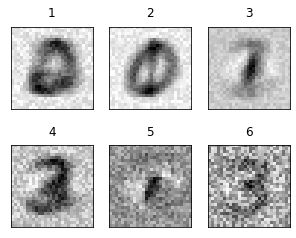

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(5, 4))

for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()

## Neural Networks Pros & Cons

### Interpretability

Modelo difícil de interpretar debido a que normalmente existen muchos nodos y no se puede responder muy bien a la pregunta de "por qué dado un input x predijo y". 

### Computation

Toma una cantidad decente de **tiempo de entrenamiento**, debido a que se va iterativamente actualizando los valores de los coeficientes. Sin embargo, **son paralelizables**.

No son lentos en realizar una predicción.

### Performance

La principal ventaja de las NN es su capacidad de desempeño. Principalmente para datasets no-estructurados.